In [1]:
import pandas as pd
import seaborn as sns

mall_df = pd.read_csv("Mall_Customers.csv")
mall_df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [2]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
mall_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


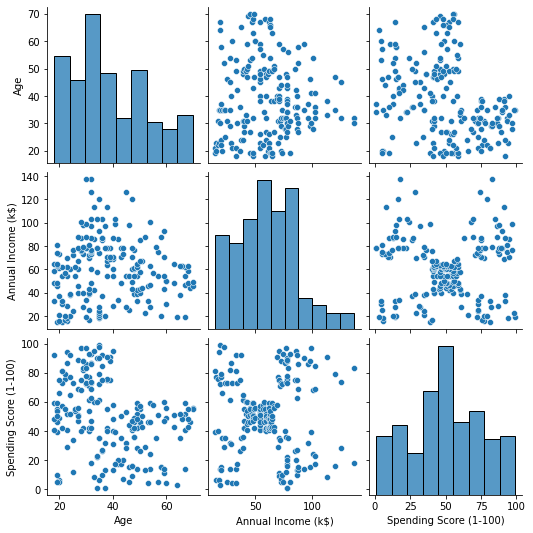

In [4]:
import seaborn as sns

sns.pairplot(mall_df.drop(["CustomerID"],axis=1))

<AxesSubplot:xlabel='Gender', ylabel='count'>

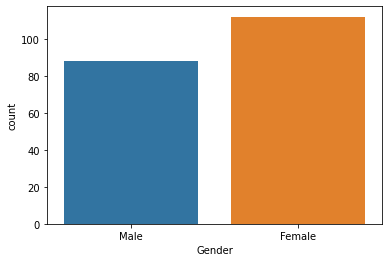

In [5]:
sns.countplot(data=mall_df, x="Gender")

In [6]:
from sklearn.preprocessing import LabelEncoder

mall_df["Gender"] = LabelEncoder().fit_transform(mall_df["Gender"])

In [7]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 5)
km.fit(mall_df)

KMeans(n_clusters=5)

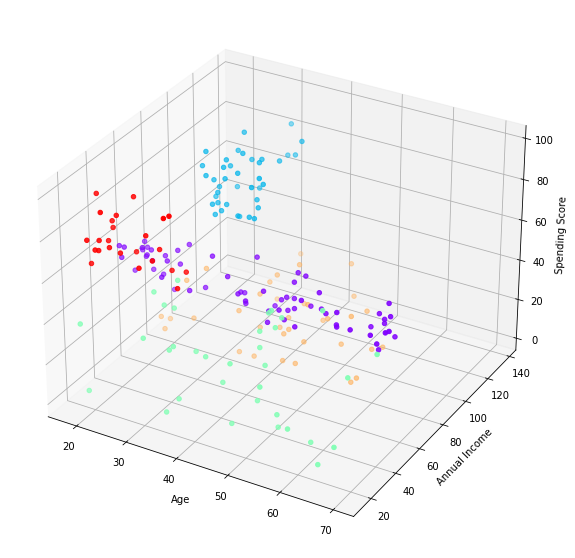

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection="3d")

ax.scatter3D(mall_df['Age'],mall_df['Annual Income (k$)'],mall_df['Spending Score (1-100)'],c=km.labels_, cmap='rainbow')

xLabel = ax.set_xlabel('Age')
yLabel = ax.set_ylabel('Annual Income')
zLabel = ax.set_zlabel('Spending Score')

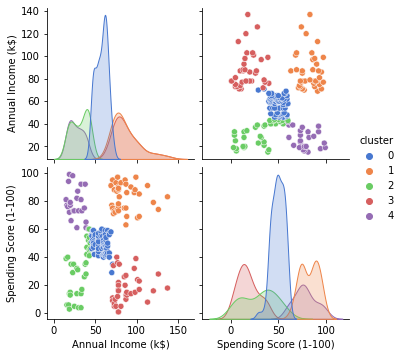

In [10]:
mall_df["cluster"] = km.labels_

sns.pairplot(mall_df, hue="cluster", vars=['Annual Income (k$)','Spending Score (1-100)'], palette="muted")